In [306]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [307]:
def pklopen(route):
    with open('./가공한데이터/{}'.format(route), 'rb') as f:
        df = pickle.load(f)
    return df
def pklsave(df, name):
    with open('{}.pkl'.format(name), 'wb') as f:
        pickle.dump(df, f)

출처:
행정동별 거주인구: 하은, 빅데이터캠퍼스
맞벌이가구비율: 하은, 통계청?
자녀연령별 맞벌이 가구 현황: 하은, 통계청?
초등학생자녀 돌봄방법: 국가통계포털 http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01&parentId=D.1;D_32.2;#SelectStatsBoxDiv
행정동별 세대수: 서울 공공데이터포털

In [308]:
#거주인구
dong_pop = pklopen('행정동별_거주인구_성별_연령.pickle')
#맞벌이 가구비율(2012년부터)
both_rate = pd.read_excel('./data/맞벌이 가구비율.xls')
#맞벌이 가구비률(2015년부터)
both_rate2 = pd.read_excel('./data/자녀연령별 맞벌이 가구 현황.xls')
#초등학생 자녀가 있는 여성 비율(경력단절)
mom_rate = pd.read_csv('./data/초등학생_자녀의_현재_돌봄방법_20201008111541.csv', encoding='cp949')
#행정동별 세대수
dong_family = pd.read_csv('./data/행정동별 세대수(17년 12월).txt', sep='\t')

##### 자녀연령별 취업여성 출처: 2018 한국의 워킹맘 보고서 https://www.kbfg.com/kbresearch/report/reportView.do?reportId=1003701
##### 행정동별 거주인구: 서울 빅데이터캠퍼스

In [309]:
#자녀연령별 여성고용률
working_dic = {'6세 이하':[44.8], '7-12세':[59.8], '13-17세':[67.3]}
working_df = pd.DataFrame(working_dic, index = ['자녀 연령별 여성 고용률(2017년)'])
working_df

,6세 이하,7-12세,13-17세
자녀 연령별 여성 고용률(2017년),44.8,59.8,67.3


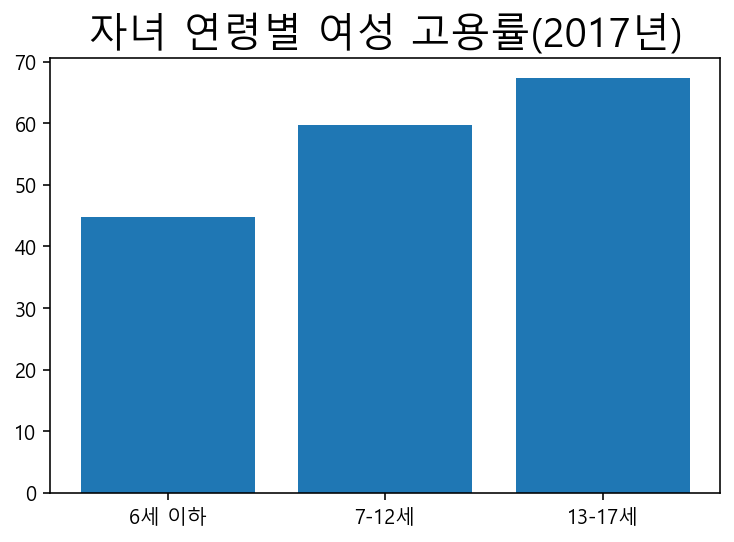

In [310]:
plt.bar(working_df.columns, working_df.iloc[0])
plt.title(label=working_df.index[0], fontdict={'fontsize':20})
plt.show()

## 워킹맘 보고서 때문에 데이터는 대부분 2017년도 근처로 맞춤. 

In [311]:
dong_pop

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,...,2529세_1,2529세_2,2024세_1,2024세_2,1519세_1,1519세_2,1014세_1,1014세_2,0509세_2,0509세_1
1725910,1117051000,후암동,757,709,722,763,745,782,601,653,...,783,748,540,524,422,330,310,270,266,299
1725912,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,...,2631,2201,2346,2649,977,908,792,773,839,880
1725913,1111070000,숭인1동,288,305,254,293,292,258,216,202,...,228,225,184,179,102,114,85,92,94,98
1725917,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,...,308,212,142,195,59,66,58,41,46,54
1725919,1117057000,원효로2동,547,586,569,634,633,640,530,576,...,501,530,385,471,292,440,230,341,267,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728432,1153059500,가리봉동,425,592,589,369,411,338,284,210,...,498,368,257,283,96,99,72,56,65,74
1728436,1156055000,당산1동,783,774,783,756,799,718,754,701,...,1087,1256,552,708,300,301,220,212,274,253
1728438,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,...,1373,1310,1116,1110,768,726,544,525,477,547
1728439,1165062000,방배3동,1024,856,838,916,852,1027,686,786,...,805,720,714,688,666,547,393,460,368,396


In [312]:
both_rate

,통계표명:,맞벌이가구 비율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,단위:,천가구. %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2011,NaN,NaN,2012,NaN,NaN,2013,NaN,NaN,...,NaN,2016,NaN,NaN,2017,NaN,NaN,2018,NaN,NaN
2,NaN,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,...,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율
3,전체,"11,761","5,241",44.6,"11,822","5,201",44.0,"11,940","5,175",43.3,...,44.1,"12,190","5,545",45.5,"12,224","5,456",44.6,"12,245","5,675",46.3
4,15~29세,259,101,39.0,240,97,40.3,217,82,37.7,...,36.8,186,72,38.6,179,66,36.8,175,68,38.6
5,30~39세,"2,356",976,41.4,"2,300",959,41.7,"2,227",924,41.5,...,43.5,"2,081",950,45.7,"2,015",954,47.3,"1,939",968,49.9
6,40~49세,"3,471","1,822",52.5,"3,430","1,788",52.1,"3,369","1,704",50.6,...,51.2,"3,235","1,705",52.7,"3,175","1,655",52.1,"3,104","1,683",54.2
7,50~64세,"3,970","1,844",47.5,"4,071","1,909",46.9,"4,231","1,968",46.5,...,48.2,"4,539","2,262",49.8,"4,604","2,240",48.7,"4,677","2,360",50.5
8,65세 이상,"1,706",459,26.9,"1,781",449,25.2,"1,896",497,26.2,...,25.4,"2,149",556,25.9,"2,251",542,24.1,"2,350",596,25.4
9,출처:,통계청 「지역별고용조사」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
both_rate2

,통계표명:,자녀연령별 맞벌이 가구 현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,단위:,"천가구, %",NaN,NaN,NaN,NaN
1,NaN,NaN,전체(0~17세),6세 이하,7~12세,13~17세
2,2015,유배우 가구,"4,761","2,134","1,330","1,297"
3,NaN,맞벌이 가구,"2,246",813,684,748
4,NaN,비율,47.2,38.1,51.5,57.7
5,2016,유배우 가구,"4,665","2,090","1,308","1,267"
6,NaN,맞벌이 가구,"2,258",827,690,741
7,NaN,비율,48.4,39.6,52.7,58.5
8,2017,유배우 가구,"4,537","2,062","1,285","1,190"
9,NaN,맞벌이 가구,"2,207",857,659,691


In [314]:
mom_rate

,응답자특성별(1),응답자특성별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2019.27,2019.28,2019.29,2019.30,2019.31,2019.32,2019.33,2019.34,2019.35,2019.36
0,응답자특성별(1),응답자특성별(2),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1순위,...,2순위,2순위,2순위,2순위,2순위,2순위,2순위,2순위,2순위,2순위
1,응답자특성별(1),응답자특성별(2),사례수 (명),응답자 본인 (%),배우자 (%),자녀의 친할아버지나 친할머니 (%),자녀의 외할아버지나 외할머니 (%),친인척 (%),민간베이비시터 (%),정부지원 아이돌보미서비스 (%),...,국공립유치원 (%),사립유치원 (%),국공립어린이집 (%),민간어린이집 (%),직장어린이집 (%),학원 (%),초등돌봄교실(방과후 학교) (%),지역아동센터 (%),혼자있음 (%),기타 (%)
2,전체,소계,1256,49.4,2.1,4.8,4.3,0.6,0.2,0.0,...,0.6,0.3,1.0,1.0,0.1,28.0,15.7,1.0,3.8,0.5
3,연령별,만25~29세,7,28.6,0.0,14.3,0.0,0.0,0.0,0.0,...,0.0,0.0,15.8,0.0,0.0,0.0,10.5,0.0,0.0,0.0
4,연령별,만30~39세,643,48.8,2.0,4.0,4.4,0.3,0.2,0.0,...,0.9,0.5,1.2,0.7,0.3,27.5,18.4,0.9,2.7,0.3
5,연령별,만40~49세,590,49.3,2.2,5.6,4.2,0.8,0.2,0.0,...,0.3,0.1,0.4,1.3,0.0,29.2,13.0,1.2,5.1,0.9
6,연령별,만50~54세,16,81.3,6.3,0.0,6.3,0.0,0.0,0.0,...,0.0,0.0,0.0,4.8,0.0,33.3,14.3,0.0,4.8,0.0
7,교육수준별,중졸이하,18,55.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.7,0.0,0.0,0.0,20.0,6.7,6.7,6.7
8,교육수준별,고졸,427,49.2,3.7,3.3,2.8,0.7,0.0,0.0,...,0.6,0.2,1.6,1.2,0.2,25.1,16.7,1.8,4.3,0.6
9,교육수준별,전문대졸,356,53.1,0.8,4.2,5.1,1.1,0.0,0.0,...,0.3,0.0,0.5,0.5,0.3,25.8,17.9,0.8,4.2,0.5


In [315]:
dong_family

,기간,자치구,행정동,전체세대수,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
0,2017.12,합계,합계,"4,220,082","1,608,998","867,814","776,452","735,420","176,927","40,051","10,106","2,772",897,645
1,2017.12,종로구,소계,"73,594","35,539","13,600","10,925","9,844","2,717",668,209,58,21,13
2,2017.12,종로구,사직동,"4,414","2,061",862,672,596,157,33,22,7,-,4
3,2017.12,종로구,삼청동,"1,414",721,247,203,163,58,14,7,1,-,-
4,2017.12,종로구,부암동,"4,325","1,623",908,747,745,209,57,26,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2017.12,강동구,둔촌1동,888,382,169,158,140,31,6,2,-,-,-
446,2017.12,강동구,둔촌2동,"11,126","3,249","2,275","2,394","2,493",566,114,26,6,2,1
447,2017.12,강동구,암사1동,"16,345","6,031","3,583","3,118","2,785",626,154,34,11,1,2
448,2017.12,강동구,천호2동,"17,305","7,991","3,691","2,805","2,176",470,135,27,8,2,-


# 전처리

In [316]:
dong_pop.reset_index(inplace=True)
del dong_pop['index']
dong_pop

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,...,2529세_1,2529세_2,2024세_1,2024세_2,1519세_1,1519세_2,1014세_1,1014세_2,0509세_2,0509세_1
0,1117051000,후암동,757,709,722,763,745,782,601,653,...,783,748,540,524,422,330,310,270,266,299
1,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,...,2631,2201,2346,2649,977,908,792,773,839,880
2,1111070000,숭인1동,288,305,254,293,292,258,216,202,...,228,225,184,179,102,114,85,92,94,98
3,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,...,308,212,142,195,59,66,58,41,46,54
4,1117057000,원효로2동,547,586,569,634,633,640,530,576,...,501,530,385,471,292,440,230,341,267,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,425,592,589,369,411,338,284,210,...,498,368,257,283,96,99,72,56,65,74
420,1156055000,당산1동,783,774,783,756,799,718,754,701,...,1087,1256,552,708,300,301,220,212,274,253
421,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,...,1373,1310,1116,1110,768,726,544,525,477,547
422,1165062000,방배3동,1024,856,838,916,852,1027,686,786,...,805,720,714,688,666,547,393,460,368,396


In [317]:
dong_family_need = dong_family[['행정동','전체세대수','1인세대','2인세대']]
dong_family_need['전체세대수'] = pd.to_numeric(dong_family_need['전체세대수'].apply(lambda x: re.sub(',','', x)))
dong_family_need['1인세대'] = pd.to_numeric(dong_family_need['1인세대'].apply(lambda x: re.sub(',','', x)))
dong_family_need['2인세대'] = pd.to_numeric(dong_family_need['2인세대'].apply(lambda x: re.sub(',','', x)))
dong_family_need

<ipython-input-317-42308337eaa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['전체세대수'] = pd.to_numeric(dong_family_need['전체세대수'].apply(lambda x: re.sub(',','', x)))
<ipython-input-317-42308337eaa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['1인세대'] = pd.to_numeric(dong_family_need['1인세대'].apply(lambda x: re.sub(',','', x)))
<ipython-input-317-42308337eaa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,행정동,전체세대수,1인세대,2인세대
0,합계,4220082,1608998,867814
1,소계,73594,35539,13600
2,사직동,4414,2061,862
3,삼청동,1414,721,247
4,부암동,4325,1623,908
...,...,...,...,...
445,둔촌1동,888,382,169
446,둔촌2동,11126,3249,2275
447,암사1동,16345,6031,3583
448,천호2동,17305,7991,3691


In [318]:
both_rate = both_rate.rename(columns=both_rate.iloc[2]).drop(both_rate.index[2]).fillna(0)
both_rate.reset_index(inplace=True)
both_rate2 = both_rate2.rename(columns=both_rate2.iloc[1]).drop(both_rate2.index[1]).fillna(0)
both_rate2.reset_index(inplace=True)

In [319]:
both_rate 

,index,NaN,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,...,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율
0,0,단위:,천가구. %,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2011,0,0,2012,0,0,2013,0,...,0,2016,0,0,2017,0,0,2018,0,0
2,3,전체,"11,761","5,241",44.6,"11,822","5,201",44.0,"11,940","5,175",...,44.1,"12,190","5,545",45.5,"12,224","5,456",44.6,"12,245","5,675",46.3
3,4,15~29세,259,101,39.0,240,97,40.3,217,82,...,36.8,186,72,38.6,179,66,36.8,175,68,38.6
4,5,30~39세,"2,356",976,41.4,"2,300",959,41.7,"2,227",924,...,43.5,"2,081",950,45.7,"2,015",954,47.3,"1,939",968,49.9
5,6,40~49세,"3,471","1,822",52.5,"3,430","1,788",52.1,"3,369","1,704",...,51.2,"3,235","1,705",52.7,"3,175","1,655",52.1,"3,104","1,683",54.2
6,7,50~64세,"3,970","1,844",47.5,"4,071","1,909",46.9,"4,231","1,968",...,48.2,"4,539","2,262",49.8,"4,604","2,240",48.7,"4,677","2,360",50.5
7,8,65세 이상,"1,706",459,26.9,"1,781",449,25.2,"1,896",497,...,25.4,"2,149",556,25.9,"2,251",542,24.1,"2,350",596,25.4
8,9,출처:,통계청 「지역별고용조사」,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,주석:,- 동거여부와 상관없이 부부(가구주와 배우자)가 모두 취업자인 가구를 의미,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
both_rate_df['자녀연령(7-12세)'].iloc[0]

1330.0

In [333]:
both_rate2.columns = ['index','연도','가구','자녀연령(0-17세)','자녀연령(6세이하)','자녀연령(7-12세)','자녀연령(13-17세)']
both_rate_df = both_rate2[['연도','가구','자녀연령(0-17세)','자녀연령(7-12세)']].drop(both_rate2.index[0])
both_rate_df['자녀연령(0-17세)'] = pd.to_numeric(both_rate_df['자녀연령(0-17세)'].astype(str).apply(lambda x: re.sub(',','', x)))
both_rate_df['자녀연령(7-12세)'] = pd.to_numeric(both_rate_df['자녀연령(7-12세)'].astype(str).apply(lambda x: re.sub(',','', x)))
both_rate_df['맞벌이 가구 중 초등학생 자녀 가구 비율(%)'] = 0
for i in range(both_rate_df.shape[0]):
    both_rate_df['맞벌이 가구 중 초등학생 자녀 가구 비율(%)']=  (both_rate_df['자녀연령(7-12세)'].iloc[i]/both_rate_df['자녀연령(0-17세)'].iloc[i])*100
both_rate_df

<ipython-input-333-e6112f1135e8>:7: RuntimeWarning: invalid value encountered in double_scalars
  both_rate_df['맞벌이 가구 중 초등학생 자녀 가구 비율(%)']=  (both_rate_df['자녀연령(7-12세)'].iloc[i]/both_rate_df['자녀연령(0-17세)'].iloc[i])*100


,연도,가구,자녀연령(0-17세),자녀연령(7-12세),맞벌이 가구 중 초등학생 자녀 가구 비율(%)
1,2015,유배우 가구,4761.0,1330.0,NaN
2,0,맞벌이 가구,2246.0,684.0,NaN
3,0,비율,47.2,51.5,NaN
4,2016,유배우 가구,4665.0,1308.0,NaN
5,0,맞벌이 가구,2258.0,690.0,NaN
6,0,비율,48.4,52.7,NaN
7,2017,유배우 가구,4537.0,1285.0,NaN
8,0,맞벌이 가구,2207.0,659.0,NaN
9,0,비율,48.6,51.3,NaN
10,2018,유배우 가구,4407.0,1318.0,NaN


### 초등학생 자녀가 있는 여성 통계
### 가-다는 미취업자, 라-바는 취업자

In [321]:
mom_age_rate = mom_rate[['응답자특성별(1)','응답자특성별(2)','2016','2019']].iloc[2:]
mom_age_rate['2016'] = mom_age_rate['2016'].astype(int)
mom_age_rate['2019'] = mom_age_rate['2019'].astype(int)
mom_age_rate

,응답자특성별(1),응답자특성별(2),2016,2019
2,전체,소계,1256,2065
3,연령별,만25~29세,7,23
4,연령별,만30~39세,643,1026
5,연령별,만40~49세,590,986
6,연령별,만50~54세,16,30
7,교육수준별,중졸이하,18,18
8,교육수준별,고졸,427,705
9,교육수준별,전문대졸,356,543
10,교육수준별,대졸이상,455,799
11,배우자유무별,유배우,1255,1981


In [322]:
mom_age_rate_df = mom_age_rate.iloc[:5]
mom_age_rate_df

,응답자특성별(1),응답자특성별(2),2016,2019
2,전체,소계,1256,2065
3,연령별,만25~29세,7,23
4,연령별,만30~39세,643,1026
5,연령별,만40~49세,590,986
6,연령별,만50~54세,16,30


In [323]:
mom_age_rate_df['2016년 연령별 구성비율(%)'] = 0
mom_age_rate_df['2019년 연령별 구성비율(%)'] = 0
for i in range(mom_age_rate_df.shape[0]):
    mom_age_rate_df['2016년 연령별 구성비율(%)'].iloc[i] = (mom_age_rate_df['2016'].iloc[i]/mom_age_rate_df['2016'].iloc[0]*100).round(1)
    mom_age_rate_df['2019년 연령별 구성비율(%)'].iloc[i] = (mom_age_rate_df['2019'].iloc[i]/mom_age_rate_df['2019'].iloc[0]*100).round(1)
mom_age_rate_df

<ipython-input-323-e9510f4c516a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mom_age_rate_df['2016년 연령별 구성비율(%)'] = 0
<ipython-input-323-e9510f4c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mom_age_rate_df['2019년 연령별 구성비율(%)'] = 0
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,응답자특성별(1),응답자특성별(2),2016,2019,2016년 연령별 구성비율(%),2019년 연령별 구성비율(%)
2,전체,소계,1256,2065,100.0,100.0
3,연령별,만25~29세,7,23,0.6,1.1
4,연령별,만30~39세,643,1026,51.2,49.7
5,연령별,만40~49세,590,986,47.0,47.7
6,연령별,만50~54세,16,30,1.3,1.5


In [324]:
working_df

,6세 이하,7-12세,13-17세
자녀 연령별 여성 고용률(2017년),44.8,59.8,67.3


#### both_rate2가 보기 편하게 되어있어서 사용

지금 존재하는 데이터를 2017년 기준으로 본다면,

1. 초등학생 자녀가 있는 '여성'중에 59.8%는 일을 하고 있다.

2. 초등학생 자녀가 있는 '가구'중에 맞벌이 비율은 51.3%이다.

3. 각 행정동/성별/연령별 '거주인구' 데이터가 있다.

4. 

1,2번의 조사대상집단 구성원은 다르다. 하지만 샘플이 충분하면 대표성을 띈다고 생각할 수 있다.


3번의 거주인구는 가구가 아니다.

구글: 세대 즉 가족은 혈연, 혼인, 입양 등으로 한 집안을 이룬 사람들의 집단인 반면, 가구는 혈연관계와는 상관없이 주거와 생계를 같이 하는 단위를 말한다.

2번의 가구가 혈연 비포함이라고 본다면 아이가 있을 수 없으니(혈연/입양이 아닌데 초등학생 아이가 있을 수 없음) 세대라고 보는게 맞고, 유배우가구/맞벌이 가구 모두 부부가 존재하는것을 가정했기에 3인 이상 세대에서 계산해야한다.

그렇다면... 행정동별 가구가 나오고 1인 2인 3인 등으로 나오니까
1, 2인가구 제외하고부터 하는게 더 타당할수있겠네

맞벌이가정을 동별로 추정하기 위해 3단계의 계산을 거친다.

1. 각 동별 3인이상 세대를 아이가 있는 세대로 가정하고, 숫자를 구한다.(성인3명이 사는것 등이 오차가 됨)

2. 아이가 있는 세대 중 맞벌이 세대 비율을 구한다. 

3. 맞벌이 세대 중 초등학생 아이를 가진 비율을 구한다.

In [325]:
dong_family_need['3인이상세대']=0
dong_family_need['3인이상세대'] = dong_family_need['전체세대수']-dong_family_need['1인세대']-dong_family_need['2인세대']
dong_family_need = dong_family_need[dong_family_need.행정동 !='소계']

<ipython-input-325-af9587d50f13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['3인이상세대']=0
<ipython-input-325-af9587d50f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['3인이상세대'] = dong_family_need['전체세대수']-dong_family_need['1인세대']-dong_family_need['2인세대']


In [326]:
dong_family_need

,행정동,전체세대수,1인세대,2인세대,3인이상세대
0,합계,4220082,1608998,867814,1743270
2,사직동,4414,2061,862,1491
3,삼청동,1414,721,247,446
4,부암동,4325,1623,908,1794
5,평창동,7510,2393,1601,3516
...,...,...,...,...,...
445,둔촌1동,888,382,169,337
446,둔촌2동,11126,3249,2275,5602
447,암사1동,16345,6031,3583,6731
448,천호2동,17305,7991,3691,5623


In [327]:
list(dong_family_need.행정동)
for i in list(dong_family_need.행정동):
    print(i)

합계
사직동
삼청동
부암동
평창동
무악동
교남동
가회동
종로1.2.3.4가동
종로5·6가동
이화동
창신1동
창신2동
창신3동
숭인1동
숭인2동
청운효자동
혜화동
소공동
회현동
명동
필동
장충동
광희동
을지로동
신당5동
황학동
중림동
신당동
다산동
약수동
청구동
동화동
후암동
용산2가동
남영동
원효로2동
효창동
용문동
이촌1동
이촌2동
이태원1동
이태원2동
서빙고동
보광동
청파동
원효로1동
한강로동
한남동
왕십리2동
마장동
사근동
행당1동
행당2동
응봉동
금호1가동
금호4가동
성수1가1동
성수1가2동
성수2가1동
성수2가3동
송정동
용답동
왕십리도선동
금호2.3가동
옥수동
화양동
군자동
중곡1동
중곡2동
중곡3동
중곡4동
능동
구의1동
구의2동
구의3동
광장동
자양1동
자양2동
자양3동
자양4동
회기동
휘경1동
휘경2동
청량리동
용신동
제기동
전농1동
전농2동
답십리1동
답십리2동
장안1동
장안2동
이문1동
이문2동
면목2동
면목4동
면목5동
면목7동
상봉1동
상봉2동
중화1동
중화2동
묵1동
묵2동
망우3동
신내1동
신내2동
면목본동
면목3.8동
망우본동
돈암1동
돈암2동
안암동
보문동
정릉1동
정릉2동
정릉3동
정릉4동
길음1동
길음2동
월곡1동
월곡2동
장위1동
장위2동
장위3동
성북동
삼선동
동선동
종암동
석관동
번1동
번2동
번3동
수유1동
수유2동
수유3동
삼양동
미아동
송중동
송천동
삼각산동
우이동
인수동
쌍문1동
쌍문2동
쌍문3동
쌍문4동
방학1동
방학2동
방학3동
창1동
창2동
창3동
창4동
창5동
도봉1동
도봉2동
월계1동
월계2동
월계3동
공릉2동
하계1동
하계2동
중계본동
중계1동
중계4동
상계1동
상계2동
상계5동
상계8동
상계9동
상계10동
상계3.4동
상계6.7동
중계2.3동
공릉1동
녹번동
불광1동
갈현1동
갈현2동
구산동
대조동
응암1동
응암2동
신사1동
신사2동
증산동
수색동
진관동
불광2동
응암3동
역촌동
천연동
홍제1동
홍제3동
홍제2동
홍은1동
홍은2동
남가좌1동
남가좌2동
북가좌1동
북가좌2동
충현동
북아현동
신촌동
연희동

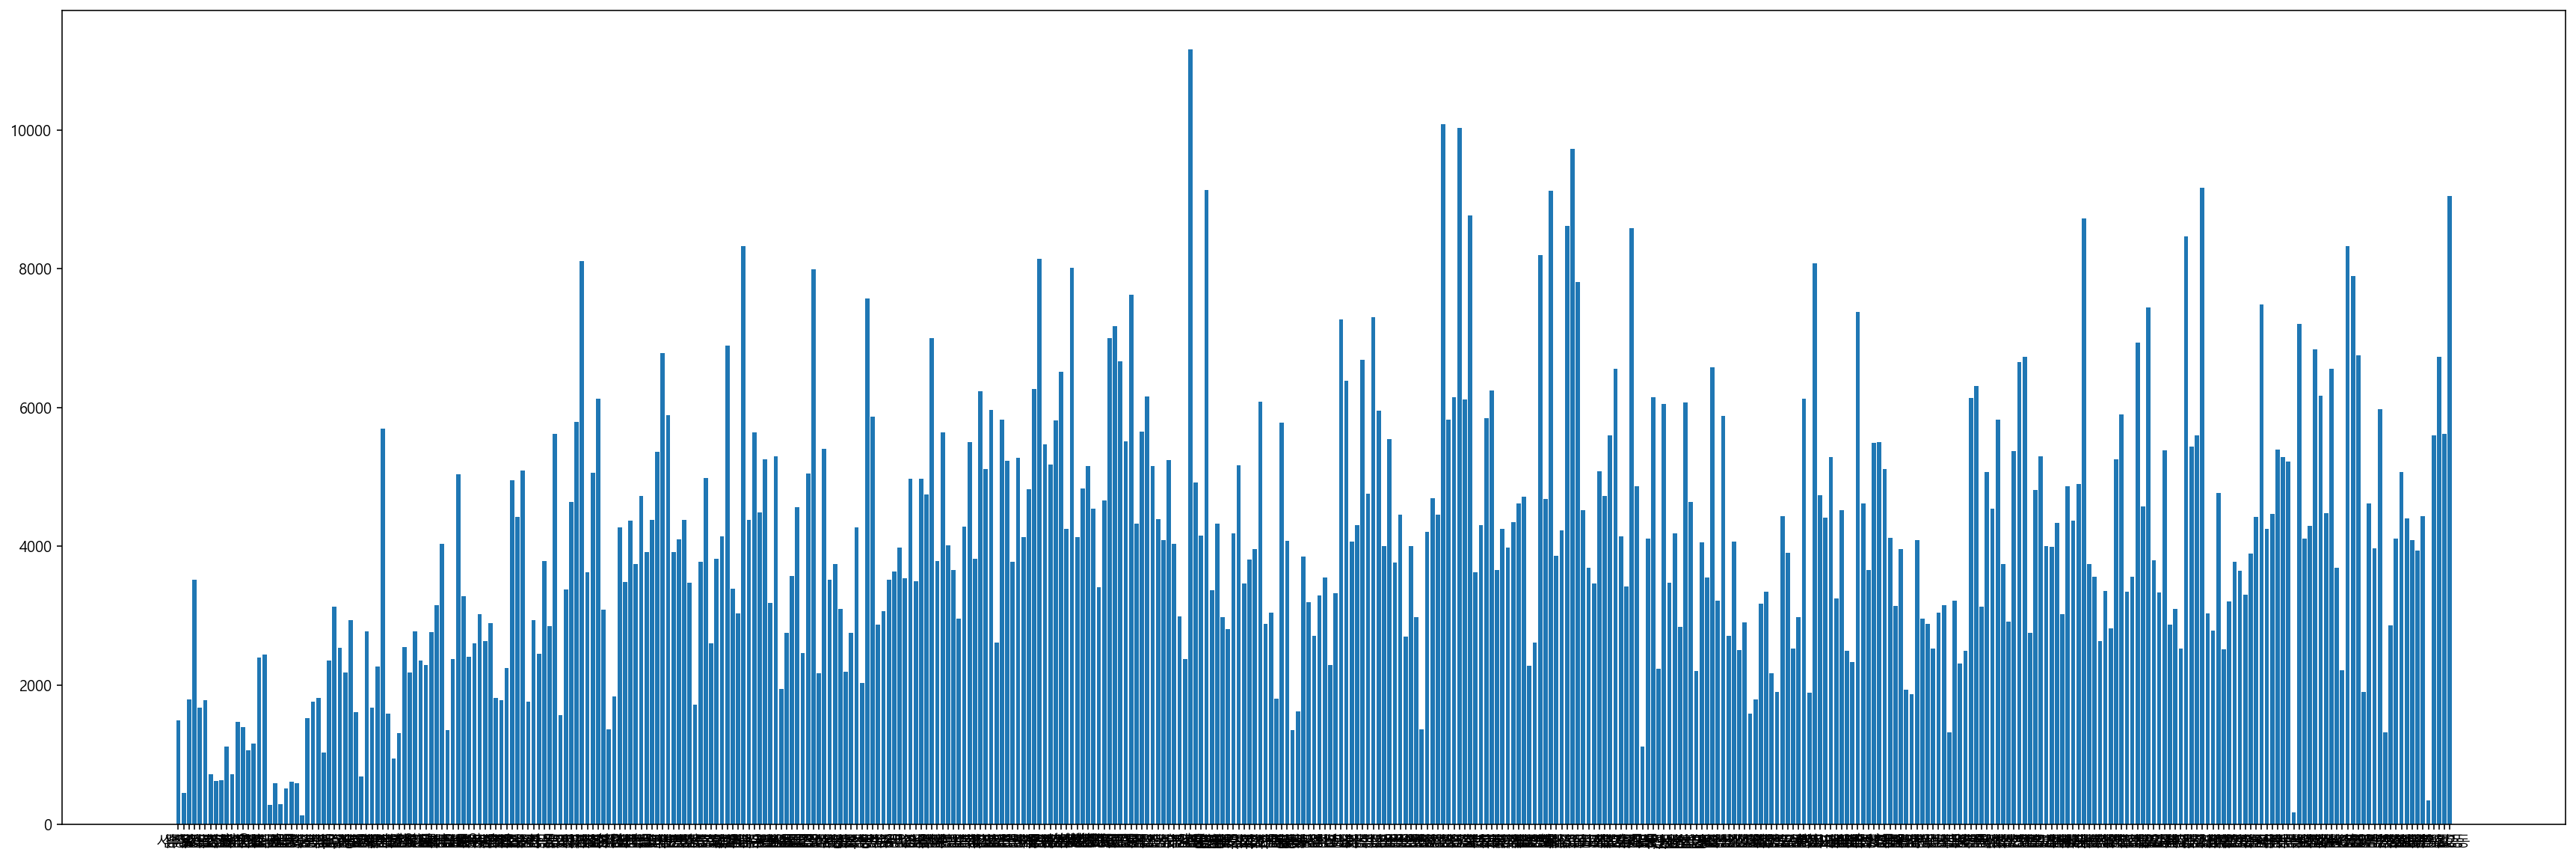

In [328]:
plt.figure(figsize=(30,10))
plt.bar(dong_family_need.행정동.iloc[1:], dong_family_need['3인이상세대'].iloc[1:])
plt.show()

In [329]:
#2017년, 유배우자 세대 중 맞벌이 세대 비율
both_rate_df.iloc[8,2]

48.6

In [330]:
#2017년, 맞벌이 세대 중 초등학생 자녀 세대 비율
both_rate_df.iloc[8,3]

51.3

In [276]:
dong_family_need['맞벌이 추정 세대'] = 0
dong_family_need['전체세대기준 맞벌이 세대 비율(%)'] = 0#맞벌이 세대 추정을 전체세대로 나눈것
dong_family_need['전체세대기준 3인이상 세대 비율(%)'] = 0
for i in range(dong_family_need.shape[0]):
    dong_family_need['맞벌이 추정 세대'].iloc[i] = (dong_family_need['3인이상세대'].iloc[i]*both_rate_df.iloc[8,3]/100).round(0).astype(int)
    dong_family_need['전체세대기준 맞벌이 세대 비율(%)'].iloc[i] = (((dong_family_need['맞벌이 추정 세대'].iloc[i]*both_rate_df.iloc[8,3]/100).round(0).astype(int))/dong_family_need['전체세대수'].iloc[i]*100).round(1)
    dong_family_need['전체세대기준 3인이상 세대 비율(%)'].iloc[i] = (((dong_family_need['3인이상세대'].iloc[i]*both_rate_df.iloc[8,3]/100).round(0).astype(int))/dong_family_need['전체세대수'].iloc[i]*100).round(1)
dong_family_need

<ipython-input-276-d12660e17e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['맞벌이 추정 세대'] = 0
<ipython-input-276-d12660e17e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_family_need['전체세대기준 맞벌이 세대 비율(%)'] = 0#맞벌이 세대 추정을 전체세대로 나눈것
<ipython-input-276-d12660e17e32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,행정동,전체세대수,1인세대,2인세대,3인이상세대,맞벌이 추정 세대,전체세대기준 맞벌이 세대 비율(%),전체세대기준 3인이상 세대 비율(%)
0,합계,4220082,1608998,867814,1743270,894298,10.9,21.2
2,사직동,4414,2061,862,1491,765,8.9,17.3
3,삼청동,1414,721,247,446,229,8.3,16.2
4,부암동,4325,1623,908,1794,920,10.9,21.3
5,평창동,7510,2393,1601,3516,1804,12.3,24.0
...,...,...,...,...,...,...,...,...
445,둔촌1동,888,382,169,337,173,10.0,19.5
446,둔촌2동,11126,3249,2275,5602,2874,13.2,25.8
447,암사1동,16345,6031,3583,6731,3453,10.8,21.1
448,천호2동,17305,7991,3691,5623,2885,8.6,16.7


In [277]:
dong_family_need.corr()

,전체세대수,1인세대,2인세대,3인이상세대,맞벌이 추정 세대,전체세대기준 맞벌이 세대 비율(%),전체세대기준 3인이상 세대 비율(%)
전체세대수,1.000000,0.999849,0.999974,0.999890,0.999890,0.000263,-0.000107
1인세대,0.999849,1.000000,0.999769,0.999488,0.999488,-0.015080,-0.015453
2인세대,0.999974,0.999769,1.000000,0.999888,0.999888,0.001414,0.001046
3인이상세대,0.999890,0.999488,0.999888,1.000000,1.000000,0.013852,0.013486
맞벌이 추정 세대,0.999890,0.999488,0.999888,1.000000,1.000000,0.013852,0.013486
전체세대기준 맞벌이 세대 비율(%),0.000263,-0.015080,0.001414,0.013852,0.013852,1.000000,0.999951
전체세대기준 3인이상 세대 비율(%),-0.000107,-0.015453,0.001046,0.013486,0.013486,0.999951,1.000000


## 맞벌이세대비율과 3인이상세대비율은 결국 똑같은 의미긴 하다. 숫자만 비율들어가서 달라진것.

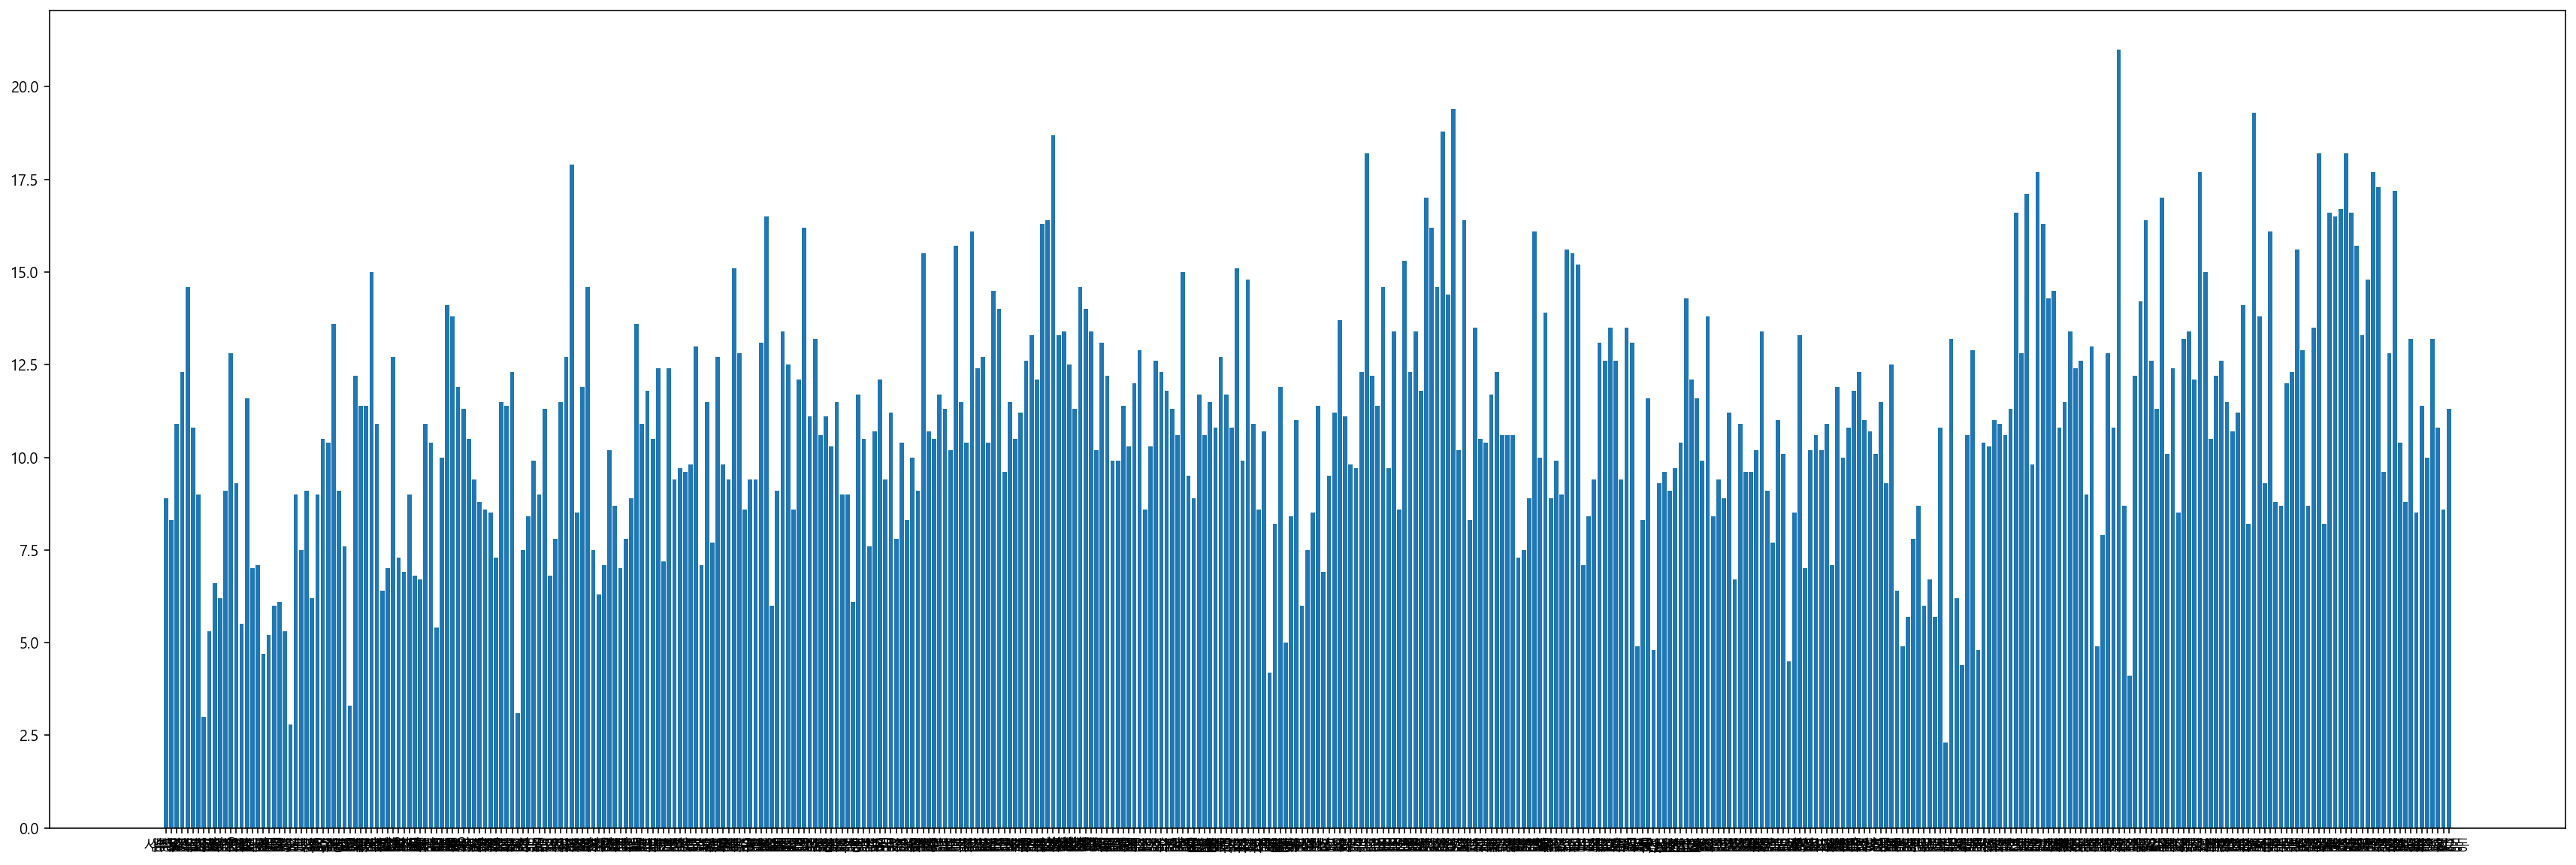

In [278]:
plt.figure(figsize=(30,10))
plt.bar(dong_family_need.행정동.iloc[1:], dong_family_need['전체세대기준 맞벌이 세대 비율(%)'].iloc[1:])
plt.show()